# About Dataset

Welcome to the Employee Salaries for Different Job Roles Dataset! This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

# Data Science Job Salaries Dataset contains 11 columns, each are:
 1. work_year: The year the salary was paid.
 2. experience_level: The experience level in the job during the year
 3. employment_type: The type of employment for the role
 4. job_title: The role worked in during the year.
 5. salary: The total gross salary amount paid.
 6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
 7. salaryinusd: The salary in USD
 8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
 9. remote_ratio: The overall amount of work done remotely
 10. company_location: The country of the employer's main office or contracting branch
 11. company_size: The median number of people that worked for the company during the year

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing dataset
df = pd.read_csv('ds_salaries.csv')

In [4]:
# reading first 5 rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Shape of the dataset
df.shape

(607, 12)

In [6]:
# Columns present in the dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

# Data Cleaning

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
# Checking missing values
df.isna().sum()                  # no missing values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# checking duplicates values
df.duplicated().sum()       # no duplicate values

0

In [10]:
# checking how many unique values we got
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

Note:- 
 - Unnamed column doestn't represent anything will remove it.

In [11]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [12]:
# confirming changes 
df.columns   # done

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
# A concise statistical summary of numerical columns from the dataset
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


# Univariate Analysis

In [14]:
# Analysis on 'work_year' column
df['work_year'].value_counts().reset_index()

,work_year,count
0,2022,318
1,2021,217
2,2020,72


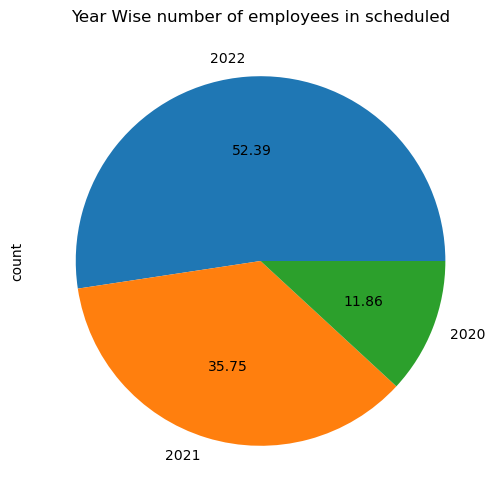

In [15]:
# piechart to see year wise employee distribution

plt.figure(figsize = (12,6))
df['work_year'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Year Wise number of employees in scheduled')
plt.show()

<Axes: >

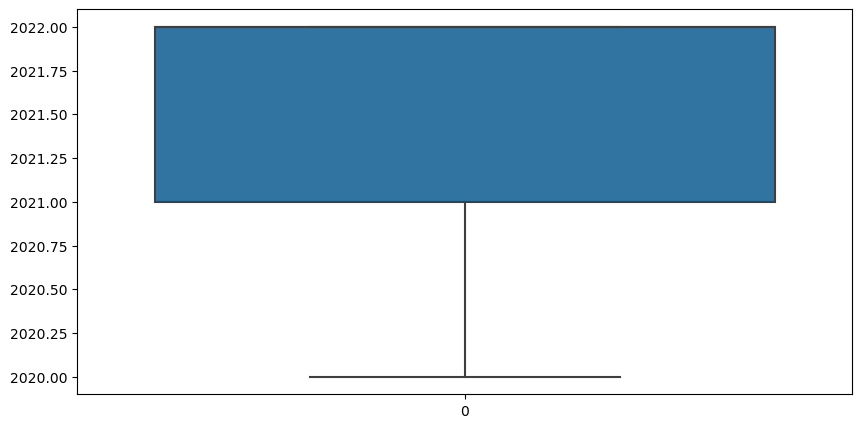

In [16]:
# boxplot to check if we have any outliers
plt.figure(figsize = (10,5))
sns.boxplot(df['work_year'])    # no outliers

Note:- 
 - Employees count is highest in 2022 then 2021 and 2020

In [17]:
# countplot function
def count_p(col):
    plt.figure(figsize = (22,11))
    ax = sns.countplot(data=df, x = df[col])
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.xticks(rotation = 90) 
    plt.show()

In [18]:
# Analysis on 'experience_level' column
df['experience_level'].value_counts().reset_index()

,experience_level,count
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [19]:
df['experience_level'] = df['experience_level'].map({'EN': 'Entry-level/Junior', 'MI' : 'Mid-level/Intermediate', 'SE' : 'Senior-level/Expert', 'EX' : 'Executive-level/Director'   })

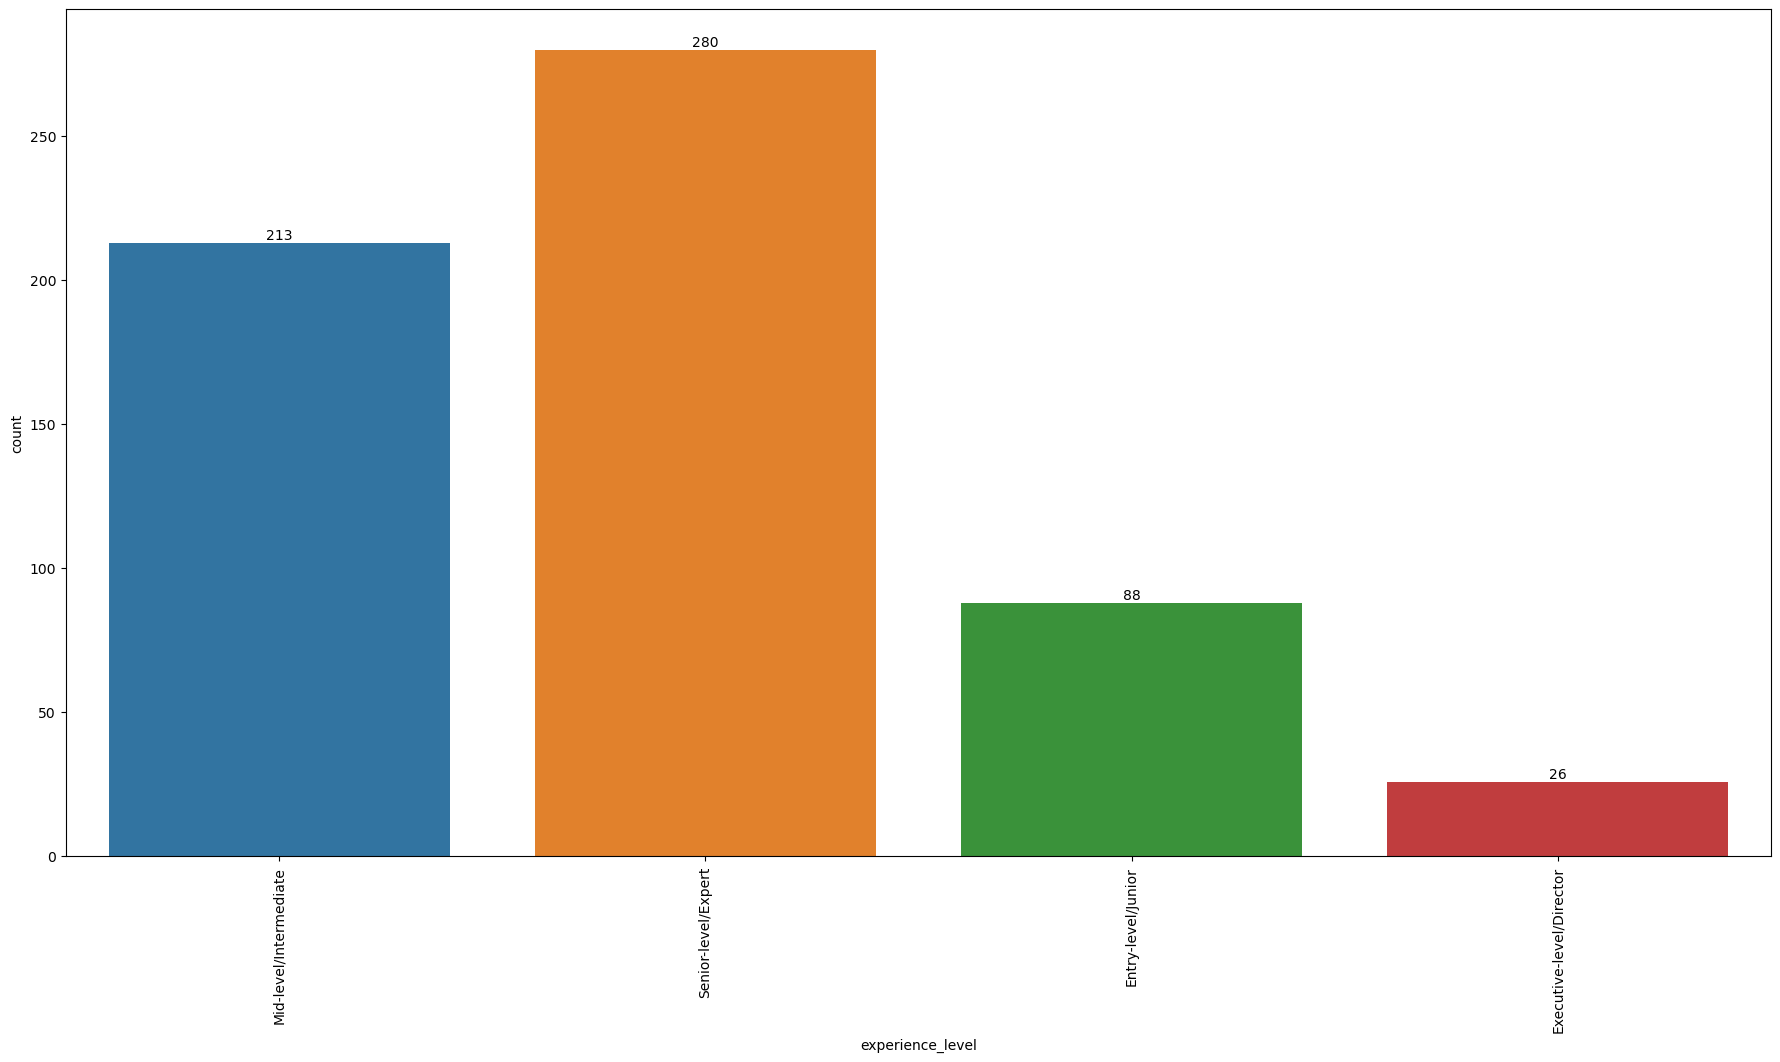

In [20]:
count_p('experience_level')

Note:- 
 - As we can see most of the employee experience level is Senior-level/Expert.
 - Then Mid-level/Itermediate followed by Entry-level/Junior And Executive-level/Director.

In [21]:
# Analysis on 'employment_type' column
df['employment_type'].value_counts().reset_index()

,employment_type,count
0,FT,588
1,PT,10
2,CT,5
3,FL,4


In [22]:
# changing experience_level column category names for simplification
df['employment_type'] = df['employment_type'].map({'FT' : 'Full-Time', 'PT' : 'Part-Time', 'CT' : 'Contract', 'FL' : 'Freelance'})

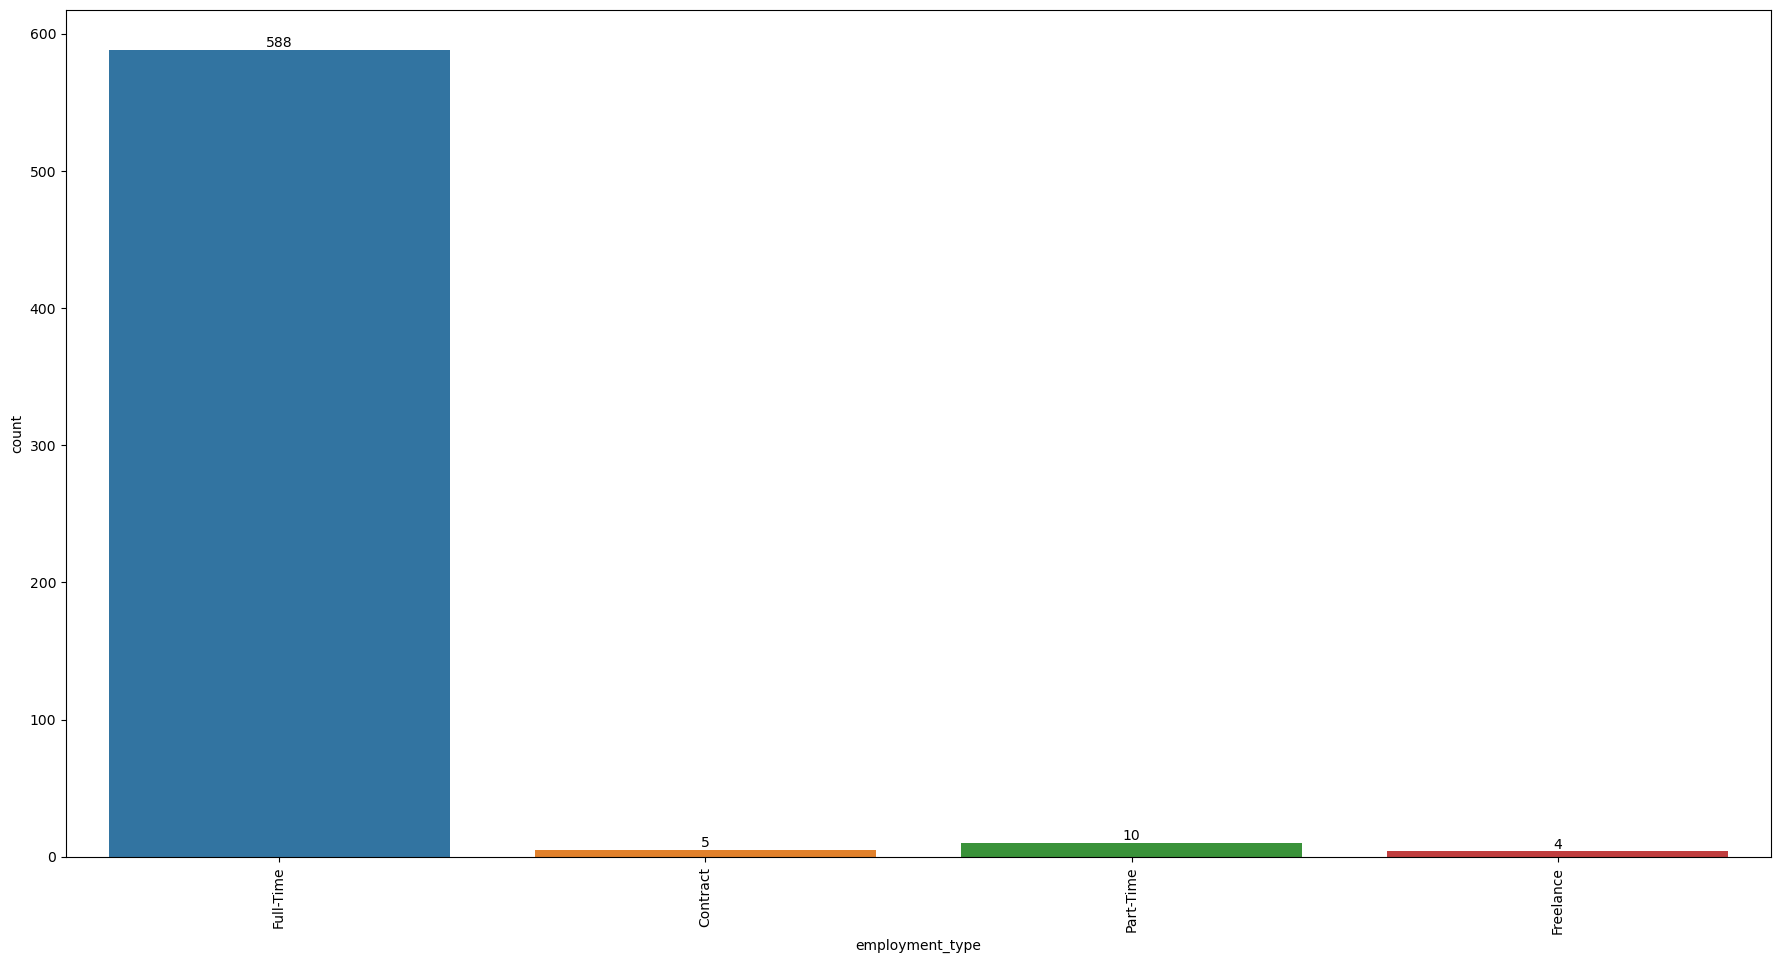

In [23]:
count_p('employment_type')

Note:- 
  - As we can see most of the prople are Full-Time worker followed by Part-Time, Contract and Freelance

In [24]:
# Analysis on 'job_title' column
df['job_title'].value_counts().reset_index().head()

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


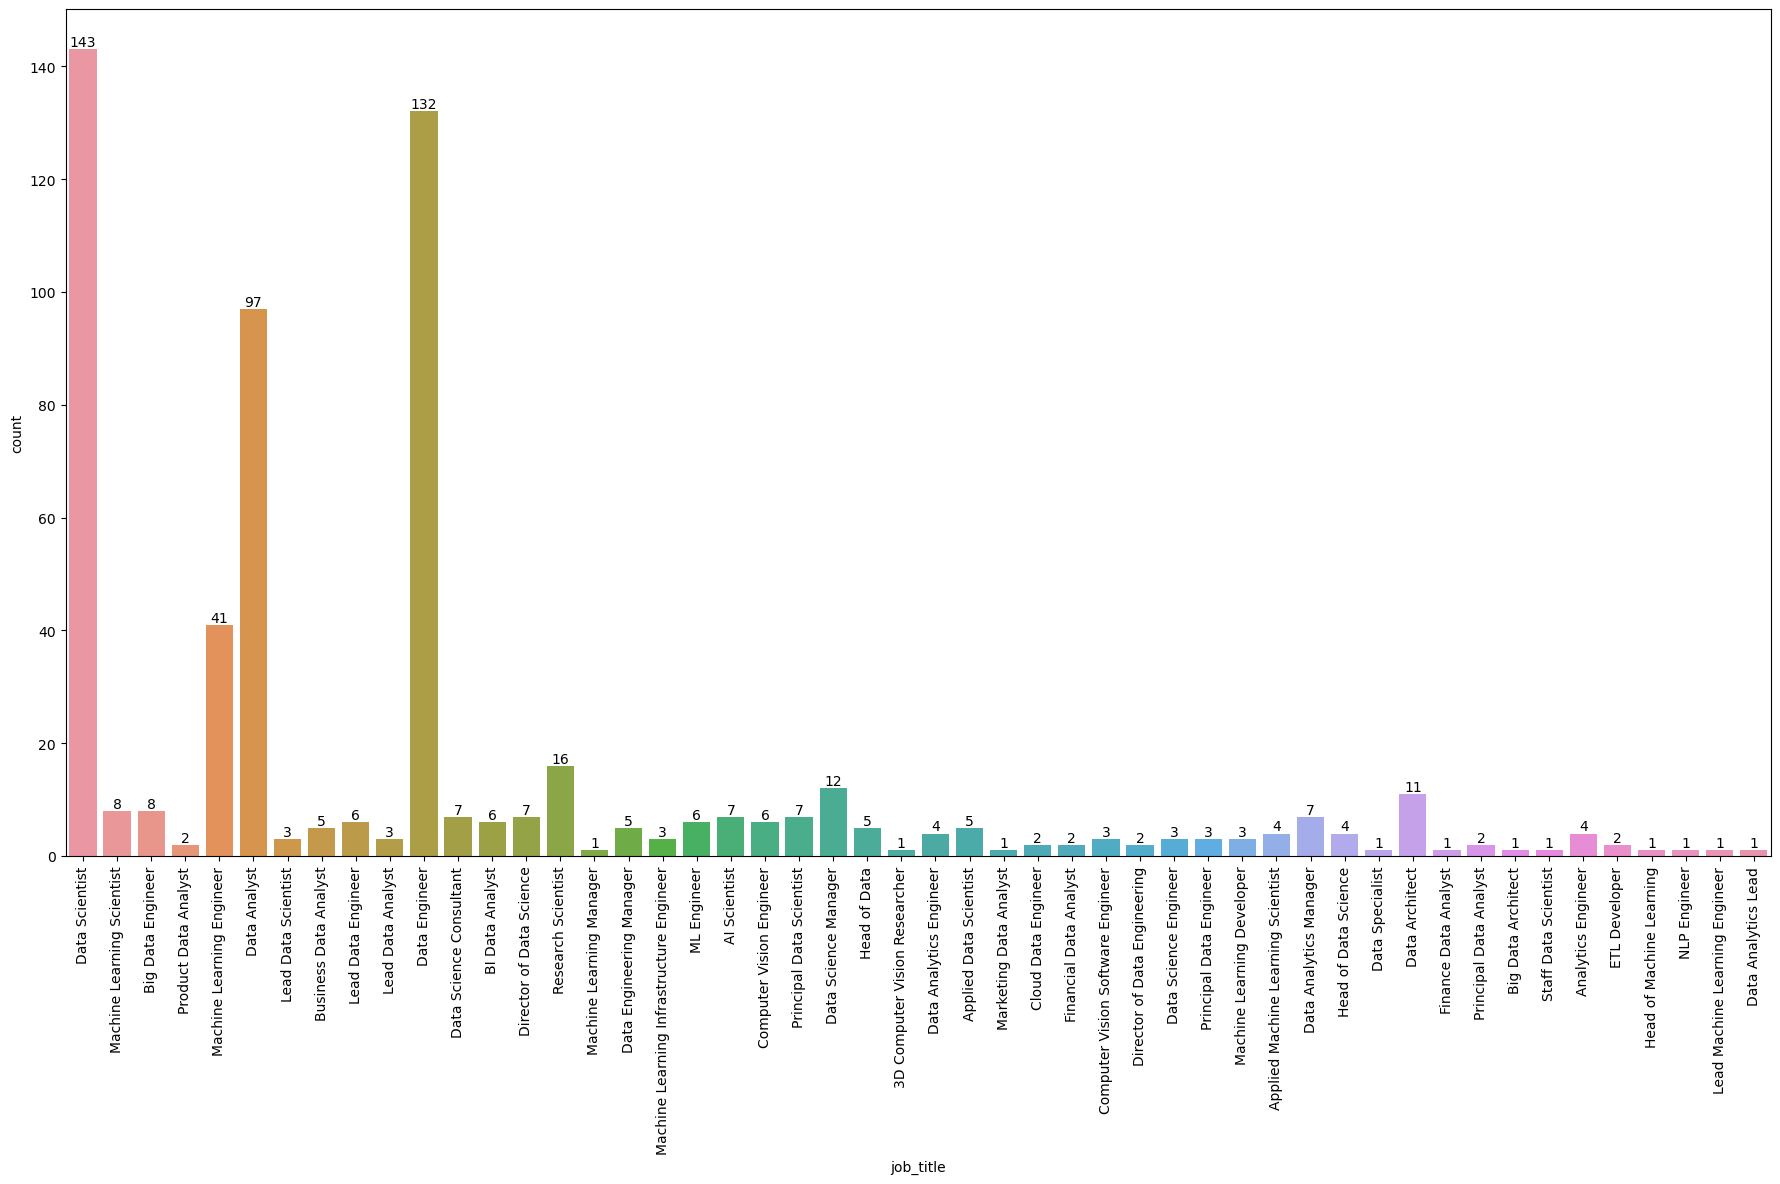

In [25]:
# checking employees job role distribution
count_p('job_title')

Note:- 
  - As we can see in our dataset most of the peoples job title is Data Scientist followed by Data Engineer, Data Analyst and Machine Learning Engineer.	

In [26]:
# Analysis on 'salary' column
df['salary'].value_counts().reset_index().head()

,salary,count
0,100000,18
1,80000,18
2,120000,15
3,60000,15
4,150000,14


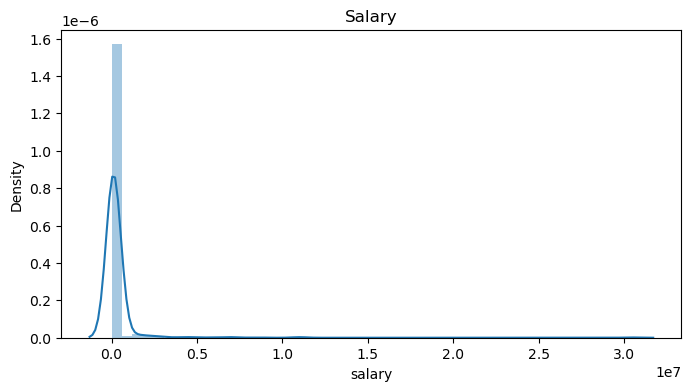

In [27]:
# displot shows salary distribution
plt.figure(figsize = (8,4))

sns.distplot(df['salary']) 
plt.title('Salary')
plt.show()

In [28]:
df['salary'].skew()

14.052915442625148

In [29]:
df['salary'].describe()

count    6.070000e+02
mean     3.240001e+05
std      1.544357e+06
min      4.000000e+03
25%      7.000000e+04
50%      1.150000e+05
75%      1.650000e+05
max      3.040000e+07
Name: salary, dtype: float64

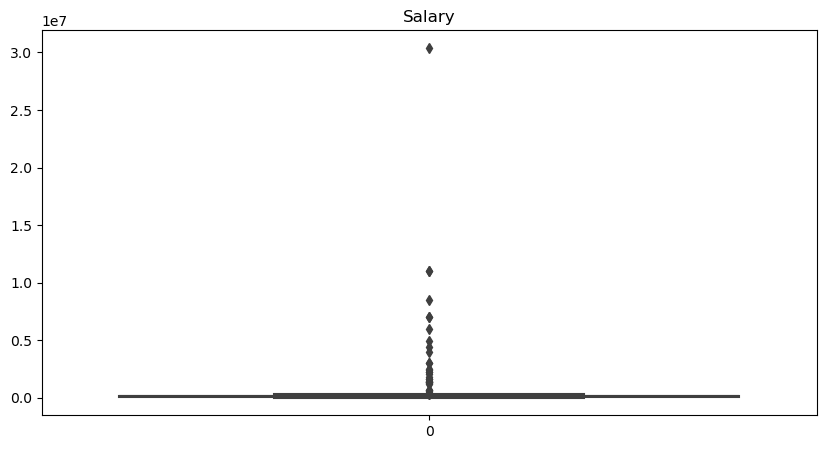

In [30]:
# boxplot to check if we have any outliers
plt.figure(figsize = (10,5))
plt.title('Salary')
sns.boxplot(df['salary'])    
plt.show()

Note:- 
 - Since most no of employees works in same domain and job title is so diverse that's why we can see  salary column is right skewed and it has outliers.

In [31]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [32]:
# Analysis on 'salary_currency' column
df['salary_currency'].value_counts().reset_index().head()

,salary_currency,count
0,USD,398
1,EUR,95
2,GBP,44
3,INR,27
4,CAD,18


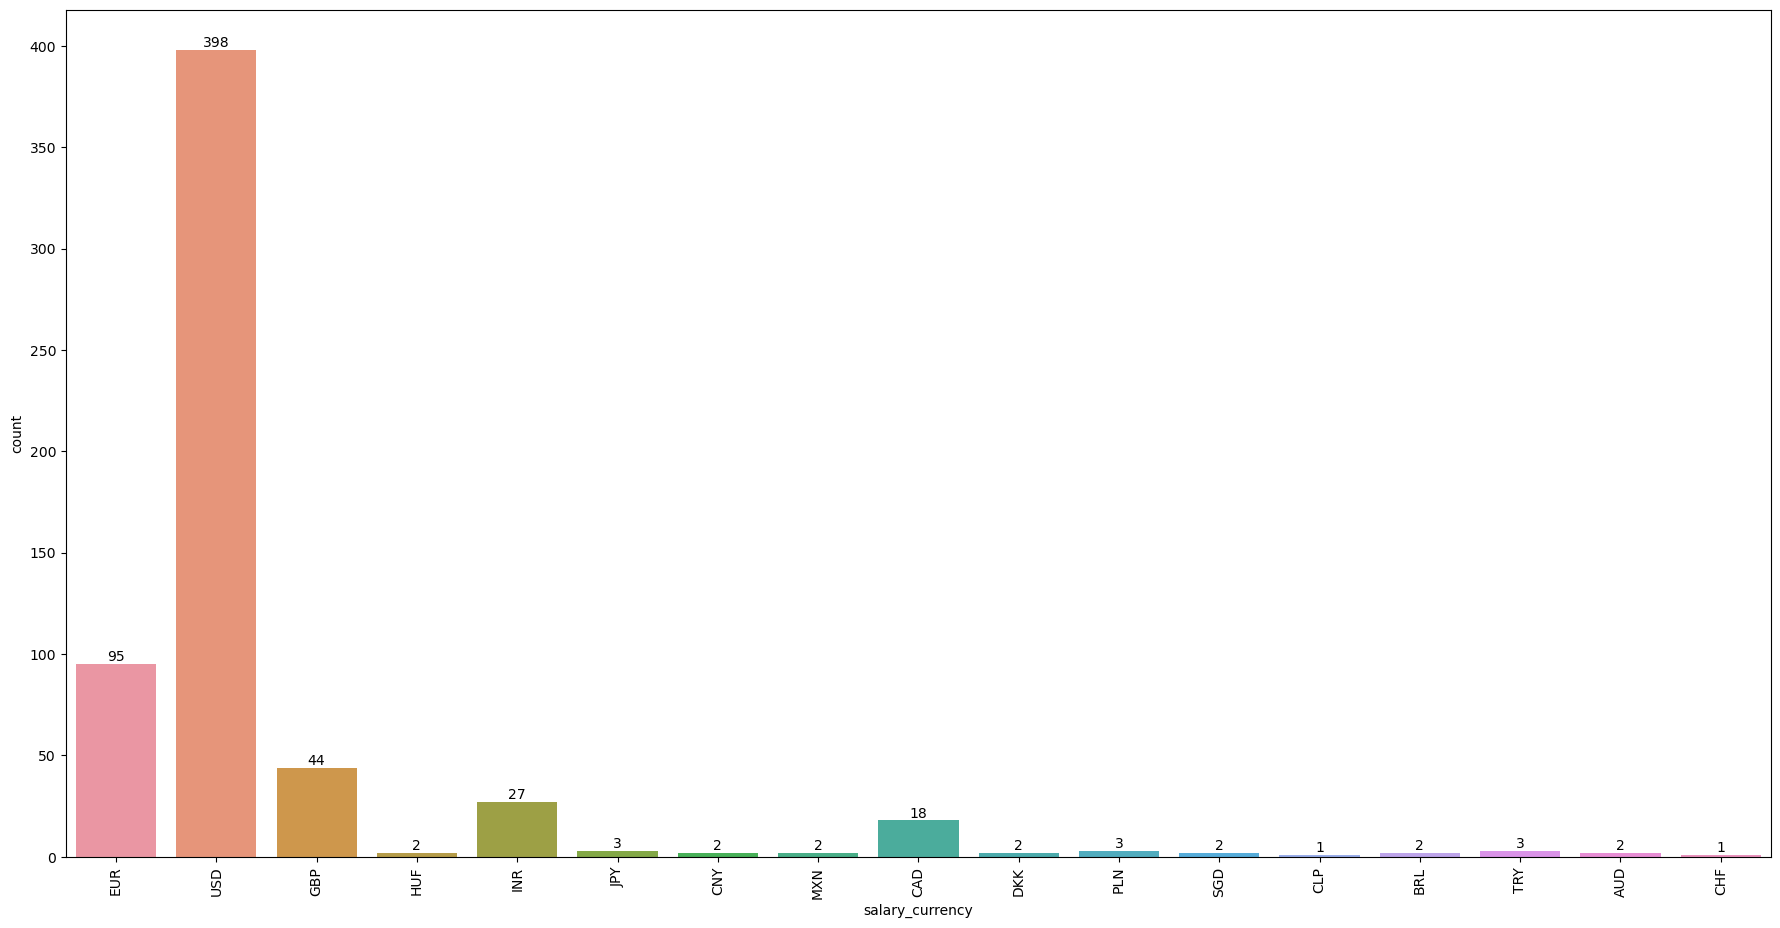

In [33]:
# checking employees salary_currency distribution
count_p('salary_currency')

Note:-
 - As we can most of people get salary in USD followed by EUR, GBP, INR	, and CAD.

In [34]:
# Analysis on 'salary_currency' column
df['salary_in_usd'].value_counts().reset_index().head()

,salary_in_usd,count
0,100000,15
1,120000,12
2,150000,12
3,200000,10
4,135000,9


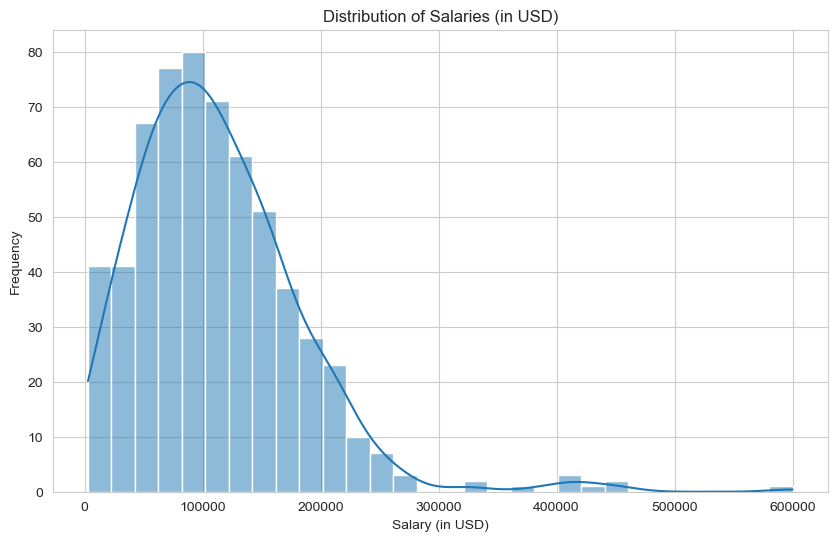

In [35]:
sns.set_style("whitegrid")

# Distribution of salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

In [36]:
df['salary_in_usd'].skew()

1.667544954563863

In [37]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

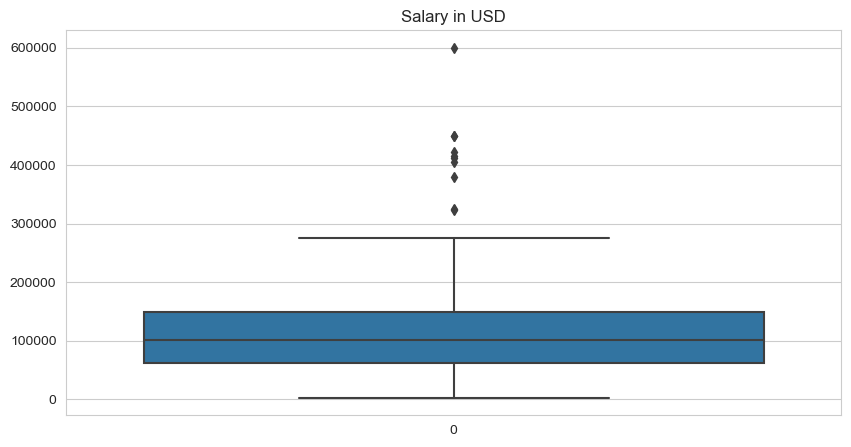

In [38]:
# boxplot to check if we have any outliers
plt.figure(figsize = (10,5))
plt.title('Salary in USD')
sns.boxplot(df['salary_in_usd'])    
plt.show()

Note:- 
 - Most of the salaries seem to be concentrated in the lower range and there are a few outliers in the higher salary range.

In [39]:
# Analysis on employee_residence column
df['employee_residence'].value_counts().reset_index().head()


,employee_residence,count
0,US,332
1,GB,44
2,IN,30
3,CA,29
4,DE,25


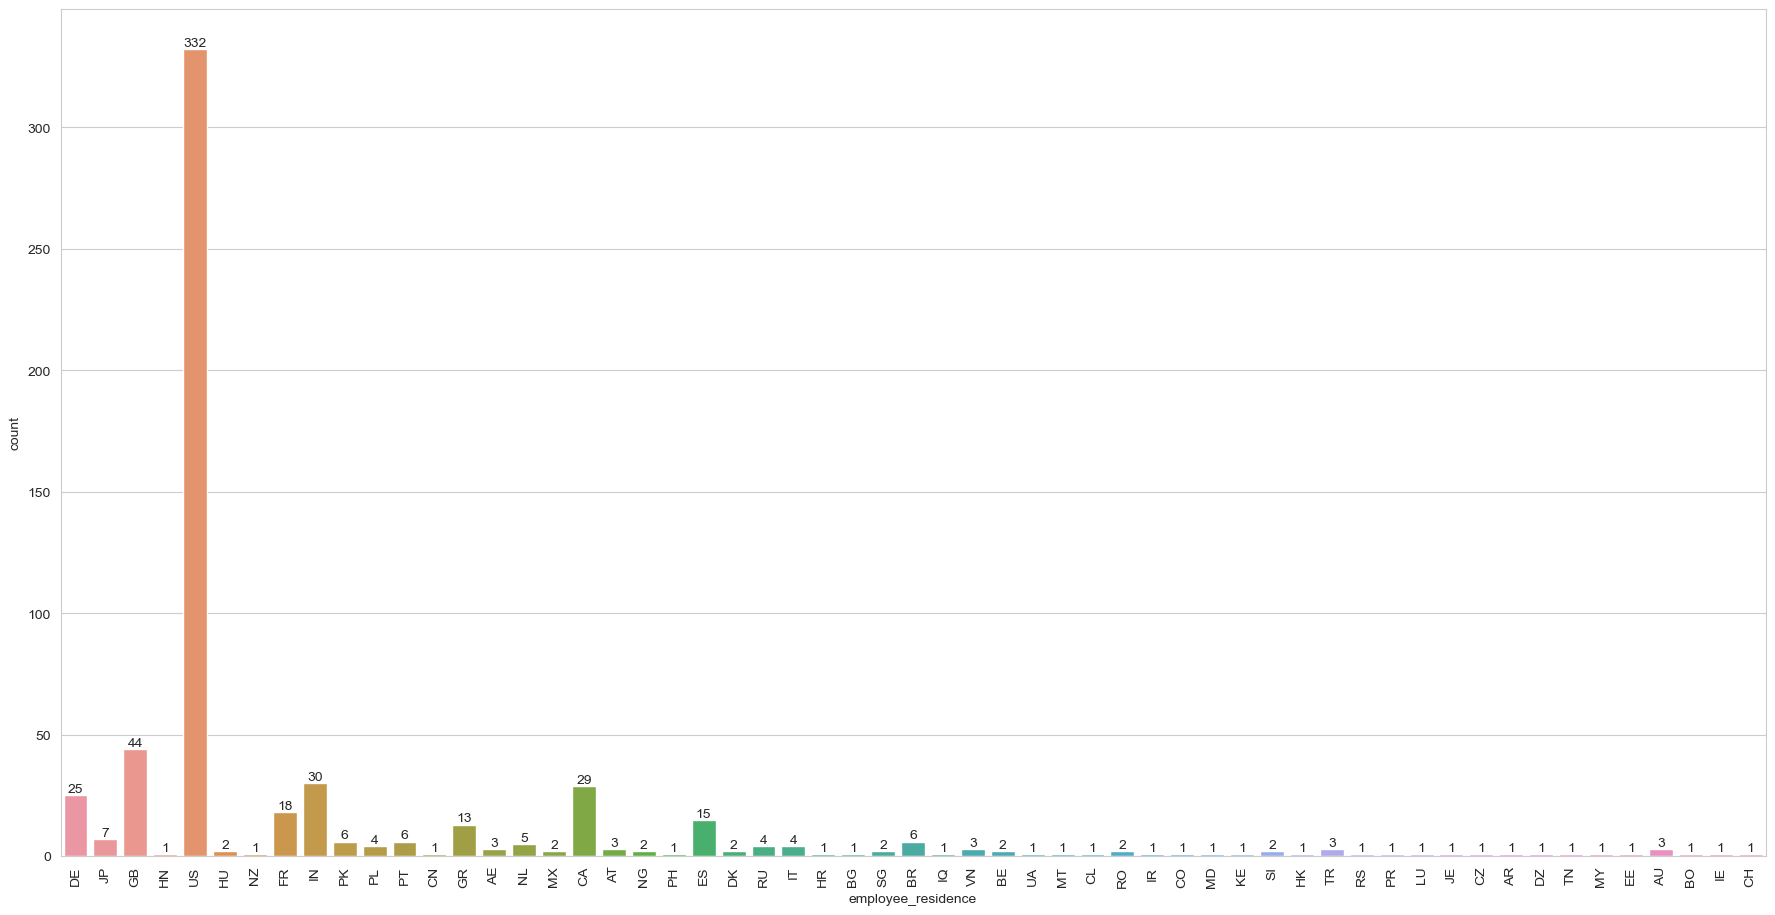

In [40]:
# checking employee_residence 
count_p('employee_residence')

Note:- 
 - Now we got a clear overview since most of employees are living in us thats why they take salaries in USD.


In [41]:
# Analysis on 'remote_ratio' column
df['remote_ratio'].value_counts().reset_index().head()

,remote_ratio,count
0,100,381
1,0,127
2,50,99


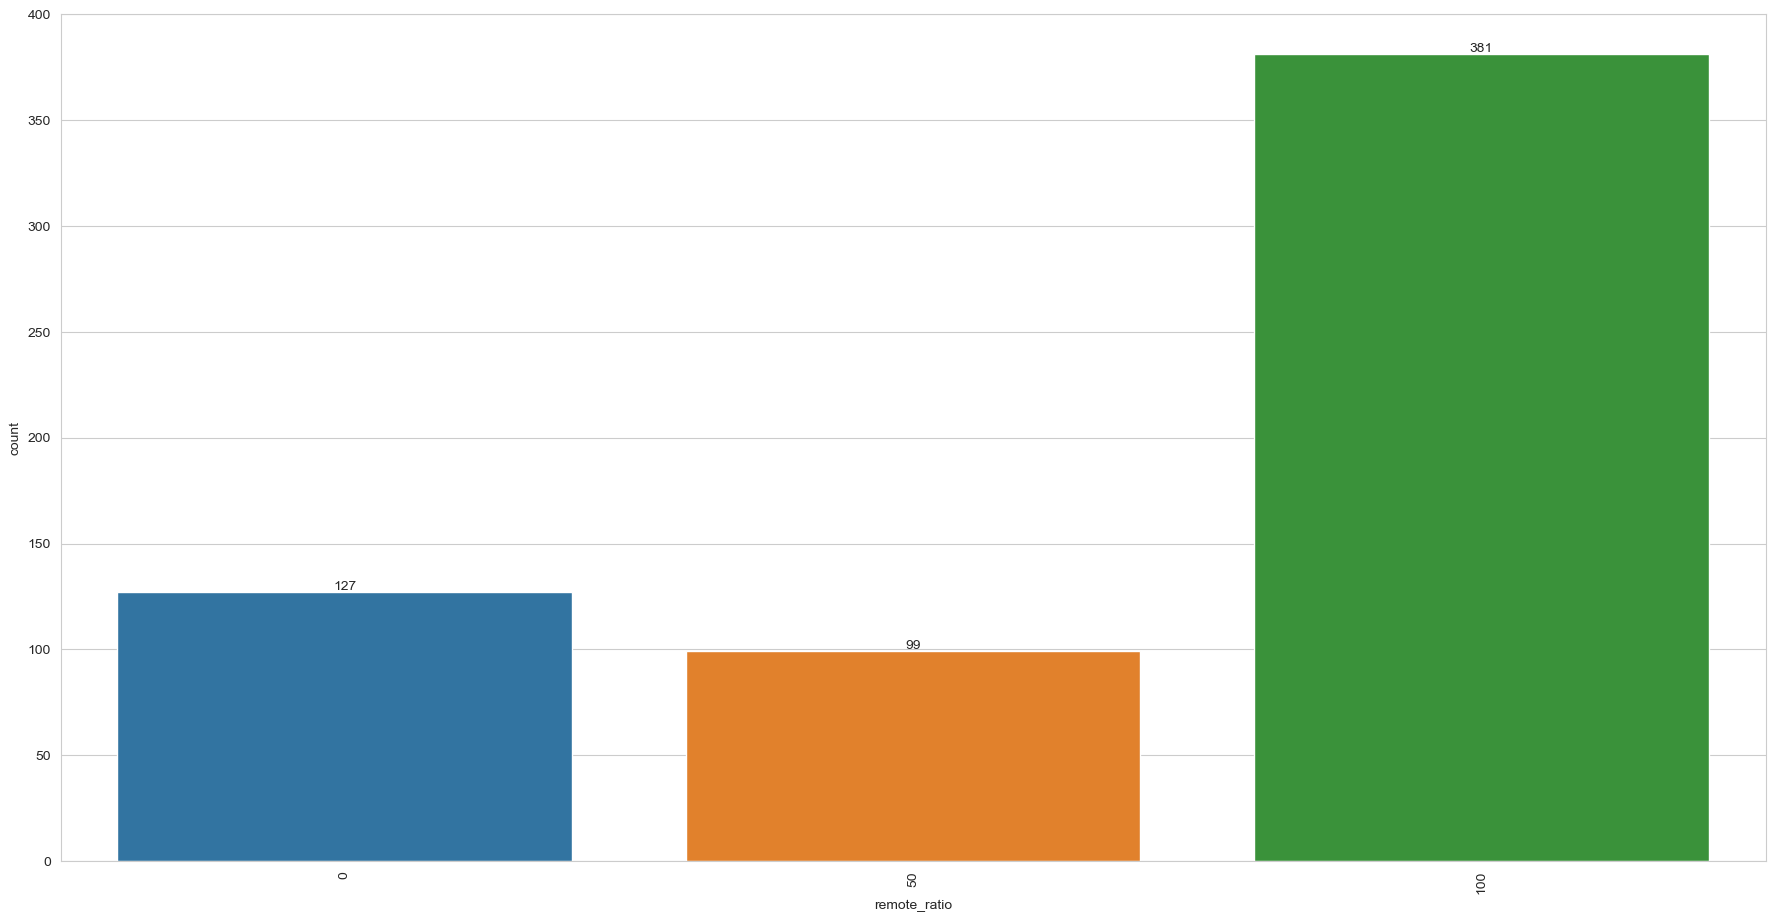

In [42]:
# countplot shows remote work count
count_p('remote_ratio')

Note:- 
 - it shows most of the employees works (100%) remotely followed by people don't do remote work(0%) and people does 50% work remotely.

In [43]:
# Analysis on 'company_location' column
df['company_location'].value_counts().reset_index().head()

,company_location,count
0,US,355
1,GB,47
2,CA,30
3,DE,28
4,IN,24


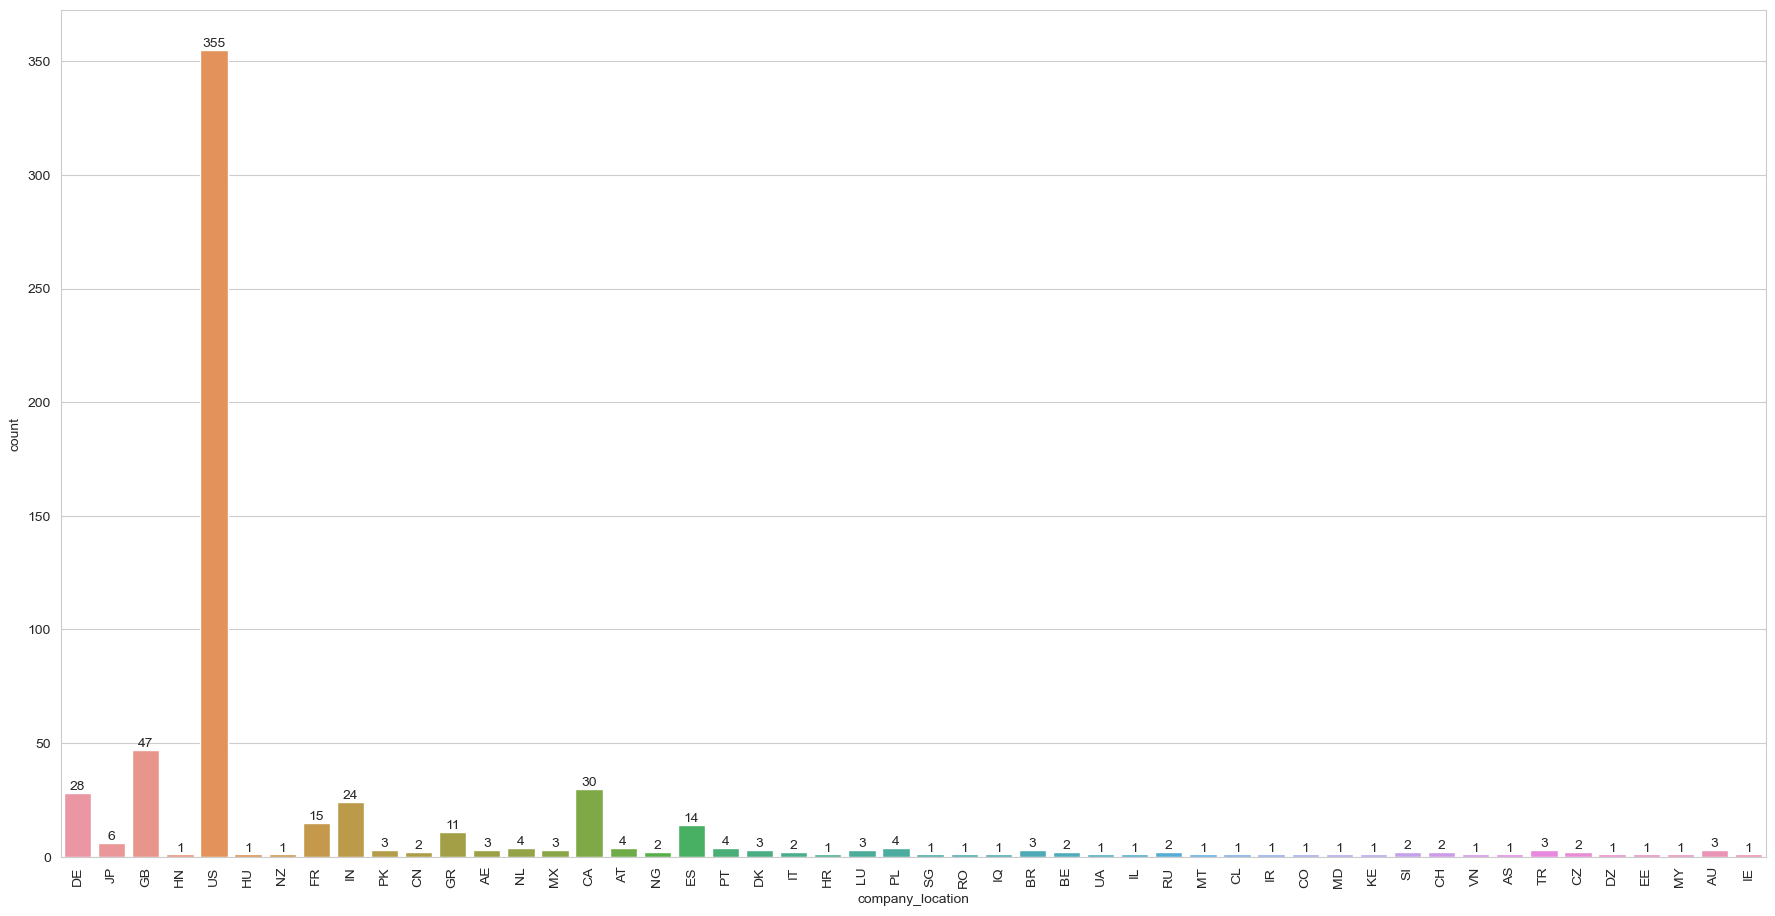

In [44]:
# countplot shows company_location count
count_p('company_location')

Note:- 
 - As We seen earlier since most of company loaction is US employees are living in us thats why they take salaries in USD.

In [45]:
# Analysis on 'company_size' column
df['company_size'].value_counts().reset_index().head()

,company_size,count
0,M,326
1,L,198
2,S,83


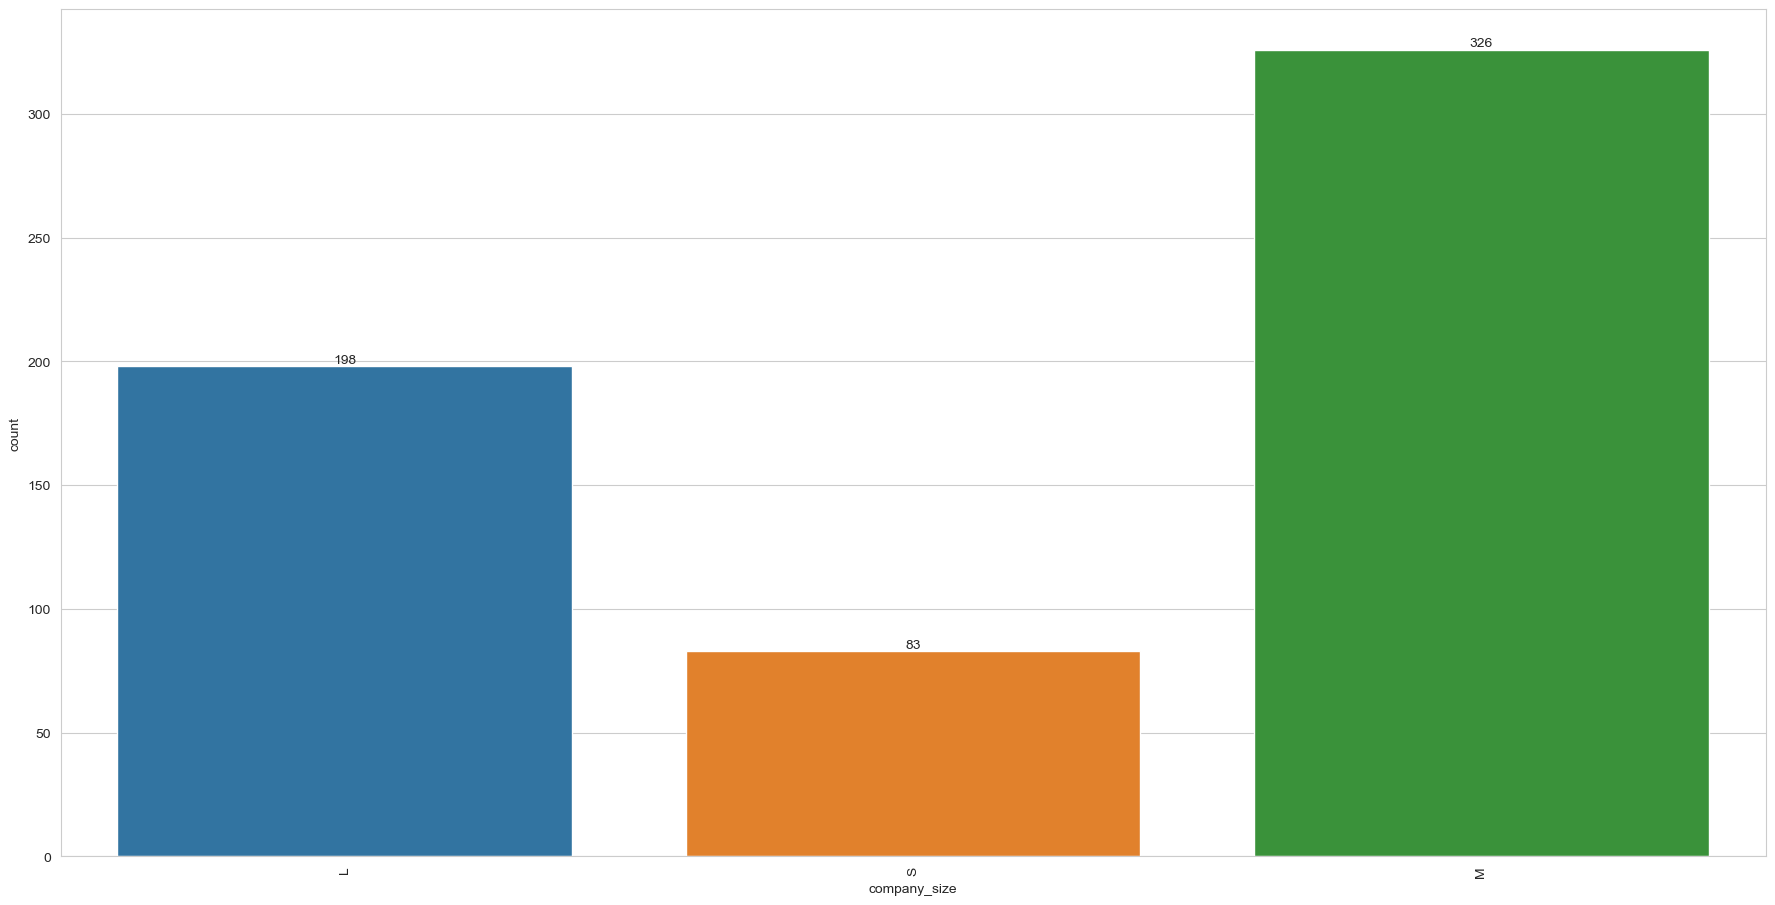

In [46]:
# countplot shows company_size count
count_p('company_size')

Note:- 
 - As we can see in our dataset most of comapany are Mid-Cap followed by Large-Cap and Small-Cap.

# Bivariate Analysis
- As Salary in USD given for all employees we are taking it as salary for all employess in order simplification of different countries currency aspect.


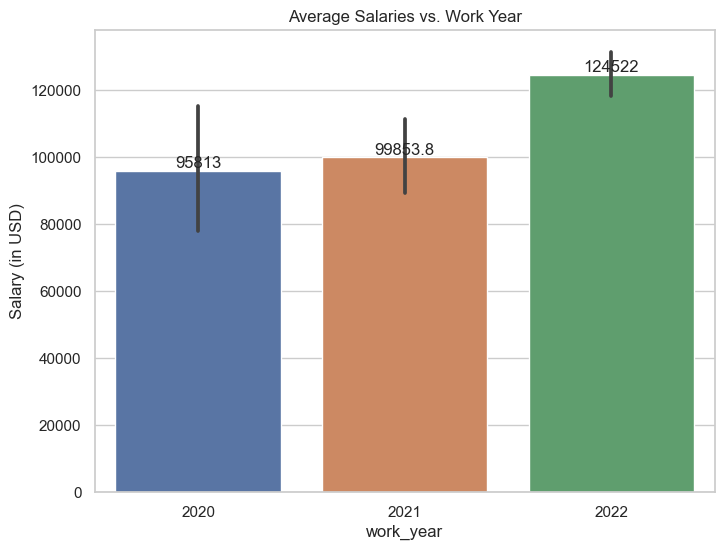

In [89]:
# Analysis on Average salaries vs. work_year

sorted_emp = df.groupby('work_year')['salary_in_usd'].mean().sort_values(ascending=True).index
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='work_year', y='salary_in_usd', order=sorted_emp)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Average Salaries vs. Work Year')
plt.xlabel('work_year')
plt.ylabel('Salary (in USD)')
plt.show()

Note:- 
 - As we seen earlier since Employees count is highest in 2022 then 2021 and 2020 so the average salary is following the order.

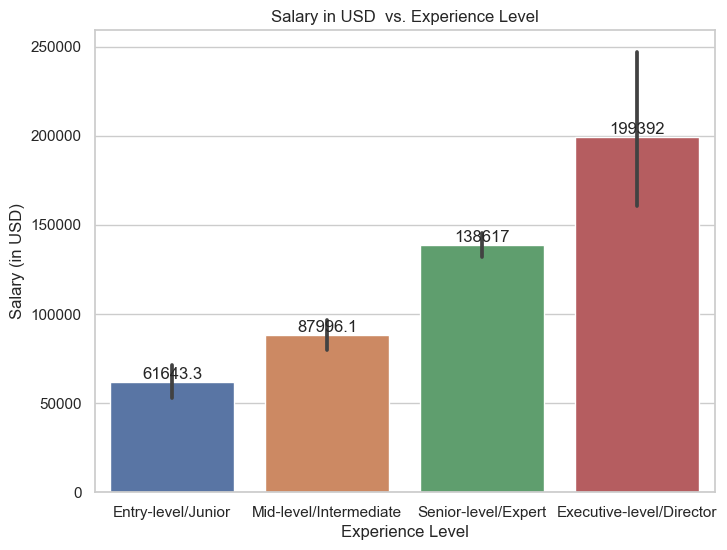

In [91]:
# Analysis on Salary in usd vs. Experience Level : 

# Ordering by Seniority of employees experience level
sorted_exp = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director'] 
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='experience_level', y='salary_in_usd', order=sorted_exp)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Salary in USD  vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()

Note:- 
 - As we can see Entry level jobs have the lowest salaries, followed by Mid Level jobs and Senior Level jobs, and Executive Level jobs have the highest salaries.

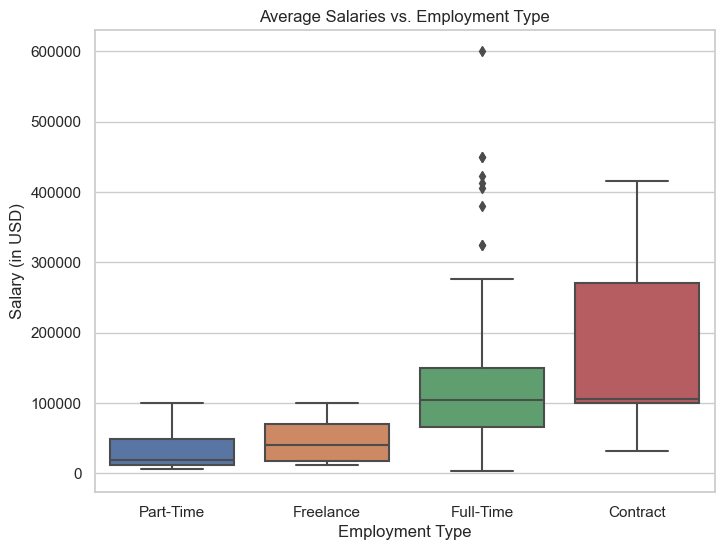

In [90]:
# Analysis on Average salaries vs. employment_type


sorted_emp = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=True).index
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', order=sorted_emp)
plt.title('Average Salaries vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.show()

Note:- 
 - As we seen earlier most of peoples work as Full-Time employee still we can see Contract jobs have the highest average salary.
 - Part-time Jobs are the least paying, followed by Freelance and Full-Time Jobs. Contract Jobs have the highest average salary, but with a lot of          variance. This might indicate that these Contract jobs are for highly specialized positions.

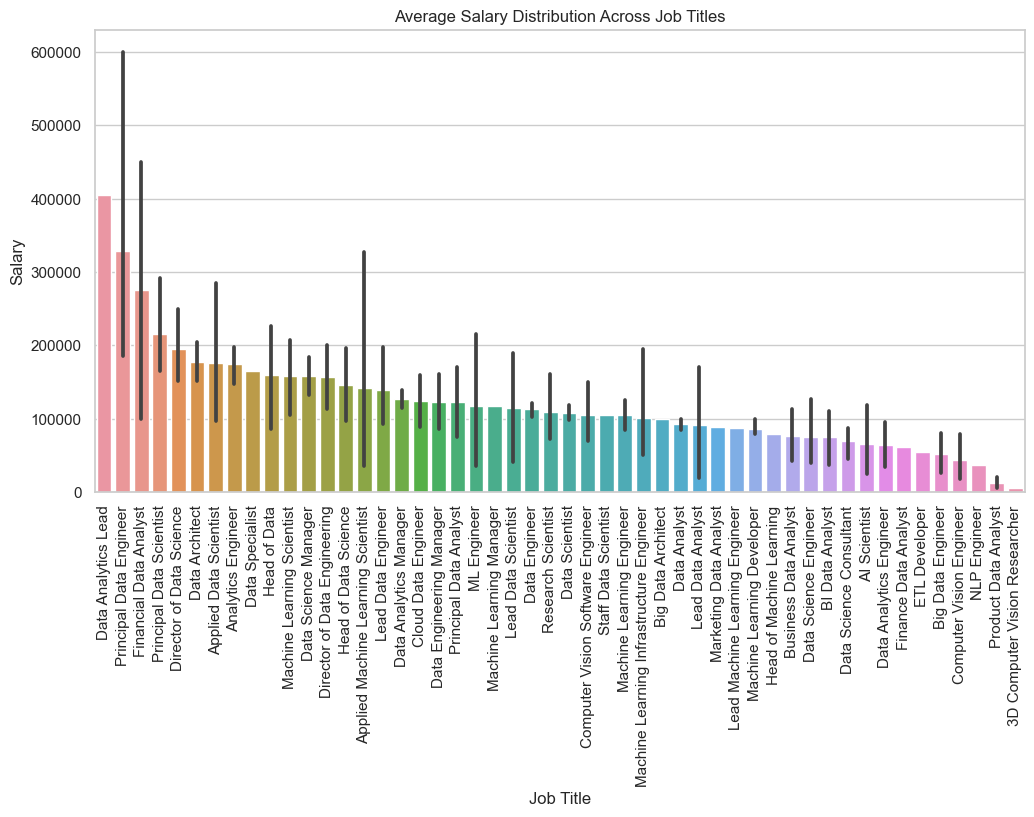

In [74]:
# Analysis job_title vs salary (Country)
sorted_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, order=sorted_roles)
plt.title('Average Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()  

Note:- 
 - The highest-paying roles in the data field include Data Analytics Lead, Principal Data Engineer, Financial Data Analyst, Principal Data Scientist, and Director of Data Science.
These positions often come with leadership responsibilities or are in lucrative sectors like finance.

 - As we move along the X-axis (likely representing different job titles), we notice significant salary differences.
Some similar-sounding roles have varying pay. This could be due to factors like location (country), remote vs. on-site work, and other considerations.

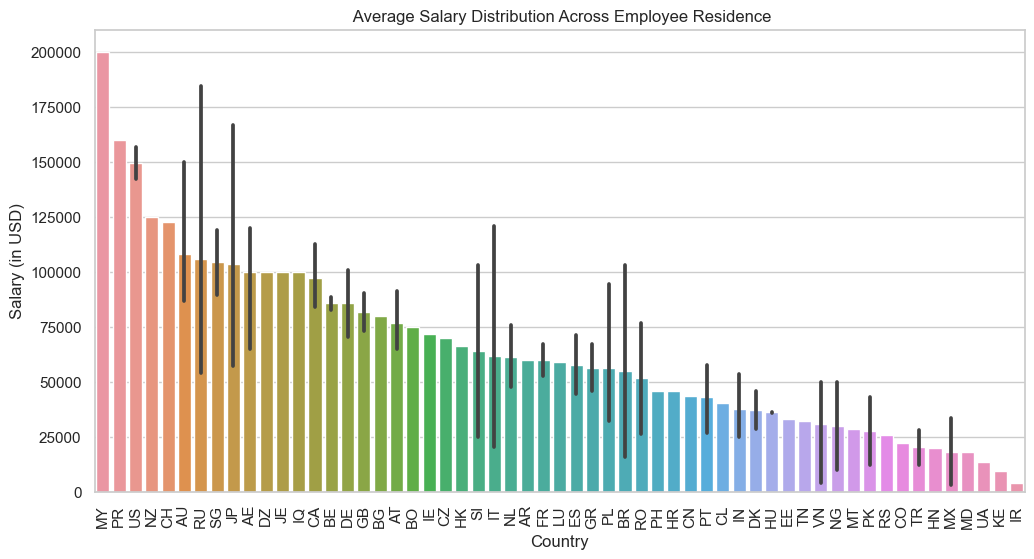

In [79]:
# Analysis Average Salary vs employee_residence (Country)
sorted_countries = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df, order=sorted_countries)
plt.title(' Average Salary Distribution Across Employee Residence')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

Note:- 
  - Well its's varies coz the dataset is diverse like as we seen earlier that most of employees are from US.
  - On average, the highest paying jobs in terms of employee residence come from Malaysia, followed by Puerto Rico and USA, New Zeeland etc.
      
 

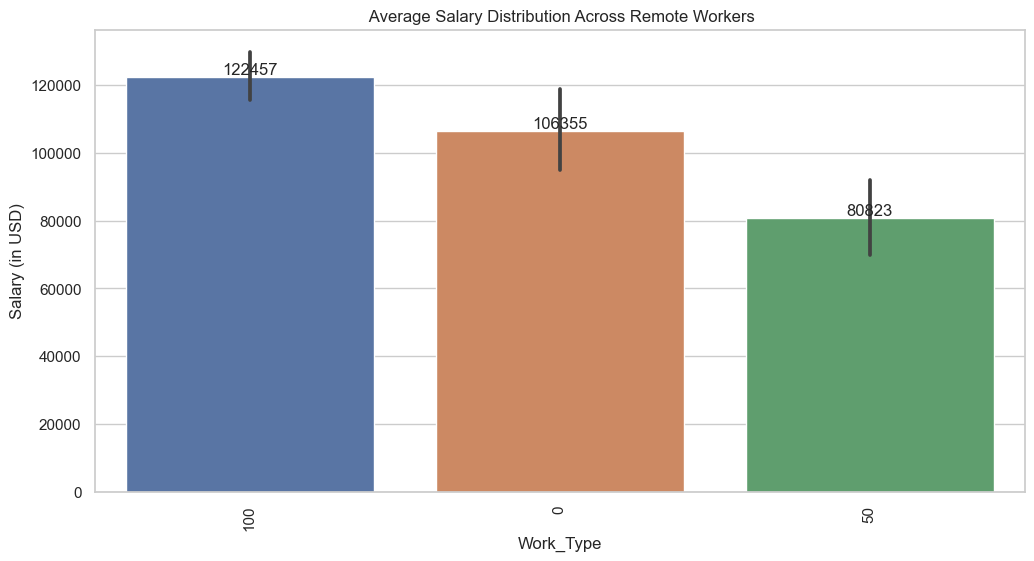

In [82]:
# Analysis Average Salary vs remote_ratio (Country)
sorted_countries = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='remote_ratio', y='salary_in_usd', data=df, order=sorted_countries)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title(' Average Salary Distribution Across Remote Workers')
plt.xlabel('Work_Type')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

Note:-
 - As we seen earlier that most of the employees works (100%) remotely followed by people don't do remote work(0%) and people does 50% work remotely.
 - So the Average salary of people who works 100% remotely is higher followed by employees who prefer work from office i.e remote work 0% and employees who does 50% remote work.

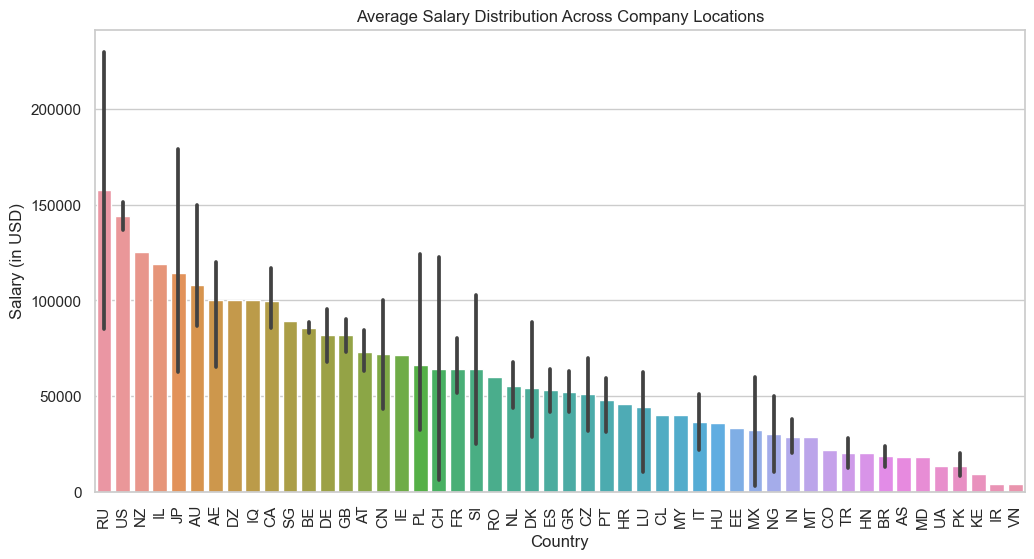

In [75]:
# Analysis Salary vs Company Location (Country)
sorted_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=df, order=sorted_countries)
plt.title('Average Salary Distribution Across Company Locations')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

Note:- 
  -  On average, the highest paying jobs seem to come from Russia, followed closely by USA. However, there is a lot of variance in the Russian salaries,      but a lot less variance in the US Job Salaries.

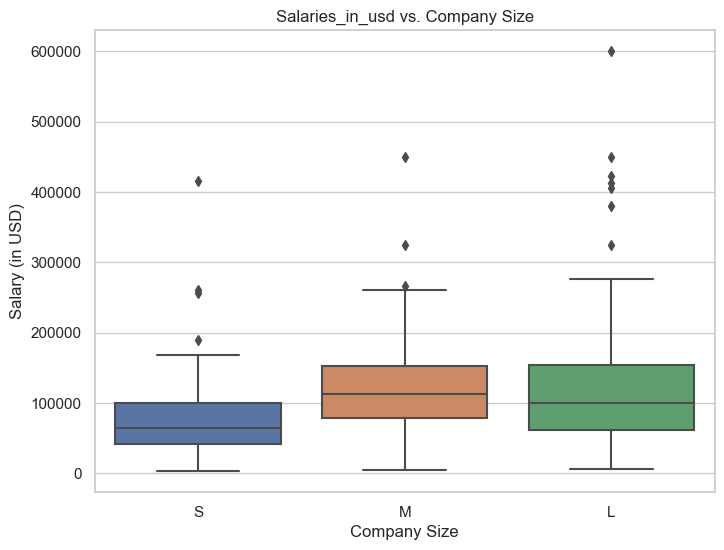

In [59]:
# Analysis on Salaries_in_usd vs. Company Size
sorted_size = ['S','M','L']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', order=sorted_size)
plt.title('Salaries_in_usd vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')
plt.show()

Note:- 
 - Small companies tend to pay less, while Medium and Large organizations pay more. The variation in salaries is wider for Large companies, which could be due to factors like company size and location.

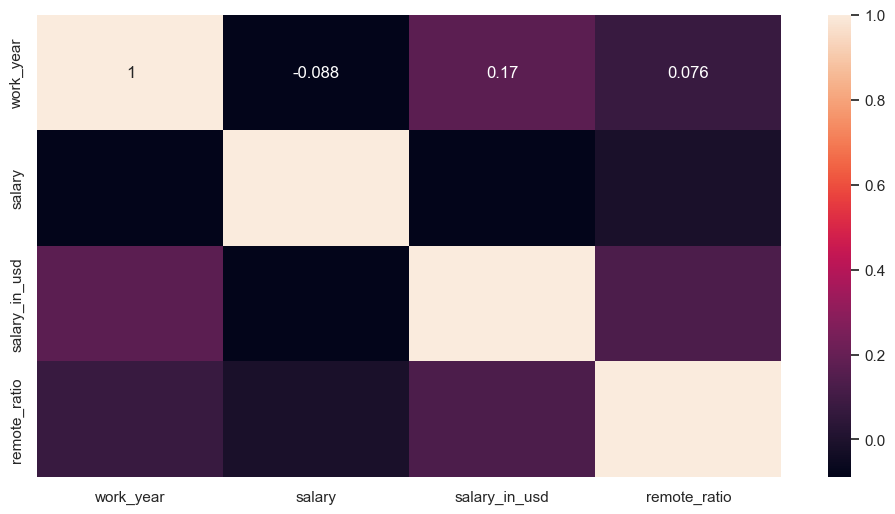

In [61]:
# finding the correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Note:-
  - As job title are so diverse  we cannot find any correlation between our numeric columns.

# Let’s summarize the key insights from Analysis Employee Salaries Based Different Job Roles :

- Employee Count Trends:
  - The employee count was highest in 2022, followed by 2021 and 2020. 

- Experience Levels: 
  - Most employees fall into the Senior-level/Expert category. 
  - Next in line are Mid-level/Intermediate, followed by Entry-level/Junior and Executive-level/Director. 

- Employment Types: 
  - Full-Time workers are the majority, followed by Part-Time, Contract, and Freelance employees. 

- Job Titles: 
  - The most common job title is “Data Scientist,” followed by “Data Engineer,” “Data Analyst,” and “Machine Learning Engineer. 

- Salary Distribution: 
  - Most employees receive salaries in USD, followed by EUR, GBP, INR, and CAD. 

- Remote Work: 
  - The majority (100%) of employees work remotely.  
  - Some employees (0%) don’t do remote work, while others (50%) work partially remotely.  

- Company Location and Currency: 
 - Since most companies are located in the US, salaries are predominantly in USD. 

- Company Size: 
 - The dataset contains more Mid-Cap companies, followed by Large-Cap and Small-Cap. 

- Salary Trends:  
  - Salaries follow the order of employee count (highest in 2022, then 2021, and 2020). 
  - Entry-level jobs have the lowest salaries, while Executive-level jobs have the highest. 

- Contract Jobs: 
  - Contract jobs have the highest average salary, but with significant variance. 
  - Part-time jobs pay the least, followed by Freelance and Full-Time positions.  

- High-Paying Roles:
  - Data Analytics Lead, Principal Data Engineer, Financial Data Analyst, Principal Data Scientist, and Director of Data Science are among the highest-paying roles.

- Salary Variability: 
  - Similar job titles may have varying pay due to factors like location and work arrangement.  

- International Salaries: 
  - On average, the highest-paying jobs are from Malaysia, followed by Puerto Rico and the USA.  

- Correlation and Diversity: 
  - Due to diverse job titles, it’s challenging to find strong correlations between numeric columns.

# Thank You